Explore the bash history of this computer
========

Load the bash history on this computer

In [90]:
from os.path import expanduser
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

def counts_of(corpus, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    matrix = vectorizer.fit_transform(corpus)
    counts = matrix.toarray().sum(axis=0)
    words = vectorizer.get_feature_names()
    return list(zip(words, counts))

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    unigram_count = counts_of(corpus, (1,1))
    bigram_count = counts_of(corpus, (2,2))

In [91]:
def plot_histogram_of(words):
    sorted_word_count = sorted(words, key = lambda x: -x[1])
    top = sorted_word_count[:10]
    top_words = list(map(lambda x: x[0], top))
    top_counts = list(map(lambda x: x[1], top))
    _ = plt.bar(top_words, top_counts) 
    plt.xticks(rotation='vertical')
    plt.title("Most popular CLI n-grams")
    plt.show()
    

The most popular unigrams are:

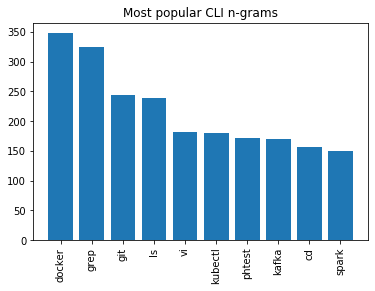

In [92]:
plot_histogram_of(unigram_count)

The most popular bigrams are:

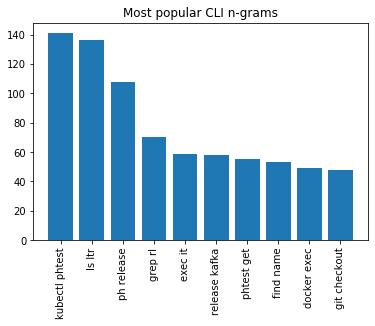

In [93]:
plot_histogram_of(bigram_count)

The entropy in the corpus:

In [94]:
from scipy.stats import entropy
import random
import statistics 

def probabilities_of(word_count):
    unzipped = zip(*word_count)
    words, counts = unzipped
    total = sum(counts)
    ps = map(lambda x: x / total, counts)
    return list(ps)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
    
print('unigram entropy ', entropy(probabilities_of(unigram_count)))
print('bigram entropy  ', entropy(probabilities_of(bigram_count)))

random.shuffle(corpus)
randomised_chunks = list(chunks(corpus[:2000], 100))

hs = []
ngram_range = (1,2)

for chunk in randomised_chunks:
    h = entropy(probabilities_of(counts_of(chunk, ngram_range)))
    hs.append(h)

print('mean = {}, std dev = {} for n-grams in range {}'.format(statistics.mean(hs), statistics.stdev(hs), ngram_range))

unigram entropy  5.4635668853298895
bigram entropy   6.659051970652459
mean = 5.8503386936585695, std dev = 0.10367574843935241 for n-grams in range (1, 2)
